In [10]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving bank_term_deposit_marketing_analysis.xlsx to bank_term_deposit_marketing_analysis.xlsx


In [11]:
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [12]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [13]:
client_info=pd.read_excel(xls, 'CLIENT_INFO')
loan_history=pd.read_excel(xls,'LOAN_HISTORY')
marketing_history=pd.read_excel(xls,'MARKETING HISTORY')
subscription_history=pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [14]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [15]:
df=pd.merge(client_info, loan_history, on=['ID'])
df=pd.merge(df,marketing_history, on=['ID'] )
df=pd.merge(df,subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df= df.drop(['ID'], axis=1)

In [17]:
df.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=9c86bad5a96aa44a064522d201a9a4e213ad0c1f7677618e30129f5e5443d74d
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [20]:
import h2o

In [21]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphuk_w8qd
  JVM stdout: /tmp/tmphuk_w8qd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphuk_w8qd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_lpwuvk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
h2o_df=h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
h2o_df.describe()

Rows:45211
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [26]:
train, test= h2o_df.split_frame(ratios=[.75])
x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

In [27]:
from h2o.automl import H2OAutoML

In [28]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [32]:
aml=H2OAutoML(max_runtime_secs= 600,
              balance_classes=True,
              stopping_metric='logloss',
              project_name='Final',
              seed=1)
%time aml.train(x=x, y=y, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 8.71 s, sys: 685 ms, total: 9.4 s
Wall time: 10min 2s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/12
# GBM base models (used / total),3/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# MAX_MODELS=20

In [33]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20230917_221909,0.936923,0.194173,0.64178,0.156567,0.247479,0.0612458
StackedEnsemble_AllModels_1_AutoML_1_20230917_221909,0.936874,0.194261,0.640339,0.159356,0.247582,0.0612967
StackedEnsemble_BestOfFamily_2_AutoML_1_20230917_221909,0.935912,0.195501,0.637375,0.164014,0.248376,0.0616905
StackedEnsemble_BestOfFamily_1_AutoML_1_20230917_221909,0.93586,0.196906,0.631342,0.161271,0.249278,0.0621395
StackedEnsemble_BestOfFamily_3_AutoML_1_20230917_221909,0.935622,0.195678,0.637671,0.152942,0.248539,0.0617717
GBM_1_AutoML_1_20230917_221909,0.93501,0.205715,0.629659,0.158159,0.255184,0.0651189
GBM_2_AutoML_1_20230917_221909,0.93463,0.202735,0.630959,0.158183,0.253007,0.0640126
GBM_3_AutoML_1_20230917_221909,0.932499,0.208167,0.62352,0.159882,0.255658,0.0653611
GBM_4_AutoML_1_20230917_221909,0.930729,0.21961,0.613929,0.16241,0.262663,0.068992
XGBoost_3_AutoML_1_20230917_221909,0.929398,0.32217,0.620149,0.187113,0.320853,0.102946


In [34]:
se= aml.leader
metalearner=h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.10/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [35]:
metalearner.varimp()

[('GBM_2_AutoML_1_20230917_221909',
  0.594536304473877,
  1.0,
  0.22623824864104378),
 ('GBM_1_AutoML_1_20230917_221909',
  0.5737020373344421,
  0.9649571153474443,
  0.21831020778991944),
 ('DRF_1_AutoML_1_20230917_221909',
  0.4659779667854309,
  0.7837670522034627,
  0.17731808523306491),
 ('XGBoost_2_AutoML_1_20230917_221909',
  0.3678046464920044,
  0.6186411893172542,
  0.139960299208348),
 ('XGBoost_3_AutoML_1_20230917_221909',
  0.29038602113723755,
  0.488424371988871,
  0.11050027451236386),
 ('XGBoost_1_AutoML_1_20230917_221909',
  0.2186368703842163,
  0.3677435149695268,
  0.08319764877580721),
 ('GBM_5_AutoML_1_20230917_221909',
  0.08481115102767944,
  0.14265092037185412,
  0.03227309439196127),
 ('XRT_1_AutoML_1_20230917_221909',
  0.03206626698374748,
  0.05393491825890075,
  0.012202141447491559),
 ('GBM_3_AutoML_1_20230917_221909', 0.0, 0.0, 0.0),
 ('GBM_4_AutoML_1_20230917_221909', 0.0, 0.0, 0.0),
 ('GLM_1_AutoML_1_20230917_221909', 0.0, 0.0, 0.0),
 ('DeepLearni

In [36]:
model=h2o.get_model('GBM_2_AutoML_1_20230917_221909')

In [37]:
model.model_performance(test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06287426069485315
RMSE: 0.25074740416373836
LogLoss: 0.20003960801839174
Mean Per-Class Error: 0.16428930450754567
AUC: 0.9314023018640787
AUCPR: 0.6003984681016677
Gini: 0.8628046037281574

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21225972727471693
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9194  878    0.0872   (878.0/10072.0)
yes    309   971    0.2414   (309.0/1280.0)
Total  9503  1849   0.1046   (1187.0/11352.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.21226      0.620646  240
max f2                       0.098083     0.727474  300
max f0point5                 0.391211     0.59388   162
max accuracy                 0.463652     0.909091  132
max precision                0.892877     1         0
max recall                   0.00226436   1         394
max specificity              0.892877     1         0
max absolute_mcc             0.199365     0.575152  245
max min_per_class_accuracy   0.109514     0.862986  293
max mean_per_class_accuracy  0.0540698    0.868501  331
max tns                      0.892877     10072     0
max fns                      0.892877     1278      0
max fps                      0.000994354  10072     399
max tps                      0.00226436   1280      394
max tnr                      0.892877     1         0
max fnr                      0.892877     0.998437  0
max fpr                      0.000994354  1         399
max tpr                      0.00226436   1         394

Gains/Lift Table: Avg response rate: 11.28 %, avg score:  9.51 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100423                   0.747434           6.84605     6.84605            0.77193          0.800309    0.77193                     0.800309            0.06875         0.06875                    584.605   584.605            0.0661686
2        0.0200846                   0.688304           6.84605     6.84605            0.77193          0.7165      0.77193                     0.758405            0.06875         0.1375                     584.605   584.605            0.132337
3        0.0300388                   0.637348           5.41543     6.37198            0.610619         0.66013     0.718475                    0.725839            0.0539063       0.191406                   441.543   537.198            0.181875
4        0.040081                    0.587871           5.44572     6.1399             0.614035         0.611752    0.692308                    0.697254            0.0546875       0.246094                   444.572   513.99             0.232194
5        0.0500352                   0.555946           5.17998     5.94893            0.584071         0.571312    0.670775                    0.672199            0.0515625       0.297656                   417.998   494.893            0.27909
6        0.10007                     0.386455           4.82472     5.38683            0.544014         0.467744    0.607394                    0.569971            0.241406        0.539062                   382.472   438.683            0.494781
7        0.150018                    0.240386           3.61319     4.79631            0.407407         0.312959    0.54081                     0.484401            0.180469        0.719531                   261.319   379.631           

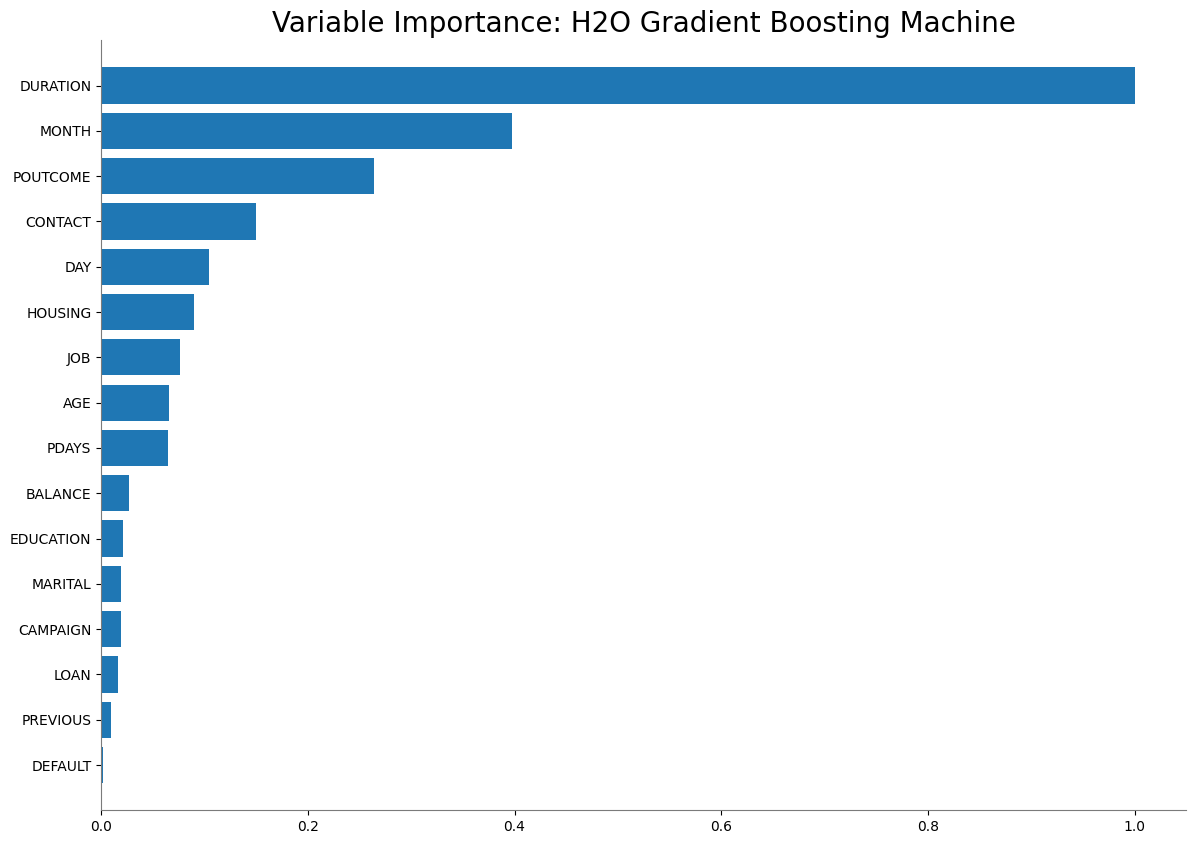

<Figure size 640x480 with 0 Axes>

In [39]:
model.varimp_plot(num_of_features=20)